## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is used to predict a numeric outcome and classification is used to predict a categorical outcome. 
2. A confusion table is a matrix that cross tabulates the predicted and actual outcomes. It helps us understand the patterns of what the algorithm correctly predicted and what the common mistakes were. For example, in the computer vision assignment the confusion table showed what numbers the KNN commonly confused like 1 and 7. 
3. The SSE quantifies how different the predictions are from the actual values. 
4. Overfitting happens when the model is too specific and too susceptible to things like noise, drawing incorrect conclusions by focusing on information that does not matter in terms of the overall pattern. Underfitting is also a problem, but occurs when the model is too generic and does not use enough information to provide an accurate explanation.
5. The train/test split is important because you will want to use enough data to train the model so that it is accurate, but still want to have enough "unused" data to test the accuracy of the model. Specifically, you should usually use more data to train and an 80/20 split is a good place to start. Choosing k by evaluating accuracy or SSE on the test set improves model performance because it will prevent under or overfitting the model. Each data set is unique, so there is no standard k value; as a result, you need to look at SSE and accuracy across several k values before selecting one. 
6. A model that outputs class labels is more straightforward when compared to something that outputs a probability distribution. For example, if you want to quickly classify digits, it may be frustrating to have a model tell you that there is a 70% chance the number is a 1 and 30% chance it is a 7; you would rather have a clear answer. On the other hand, using a probability distribution is valuable in cases where some classes are rare enough that they are never predicted even though they are in the actual dataset. For example, if we are predicting vehicle type but there are only 5 boats in the dataset, we may want to output the probability distribution instead of never predicting a vehicle is a boat. 

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [7]:
df = df[['price', 'year', 'mileage']]
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [8]:
print('Missing price values: ', sum( df['price'].isnull())) 
print('Missing year values: ', sum( df['year'].isnull())) 
print('Missing mileage values: ', sum( df['mileage'].isnull())) 
# all are 0, so nothing to clean here

Missing price values:  0
Missing year values:  0
Missing mileage values:  0


In [9]:
print("Dimensions: ", df.shape)

Dimensions:  (2499, 3)


2. Maxmin normalize `year` and `mileage`.

In [10]:
def max_min_norm(x):
    range = max(x) - min(x)
    return (x - min(x))/range

y = df['price']
X = df.loc[:, ['year', 'mileage']]
X = X.apply(max_min_norm)
df['year'] = max_min_norm(df['year'])
df['mileage'] = max_min_norm(df['mileage'])
df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [15]:
print(X_train)

          year   mileage
2460  0.957447  0.036792
1707  0.936170  0.098162
54    0.978723  0.041897
1735  0.978723  0.048386
2188  0.978723  0.028750
...        ...       ...
350   0.978723  0.020482
1930  0.957447  0.003947
79    0.978723  0.041056
1859  0.978723  0.021625
1544  0.978723  0.016332

[1999 rows x 2 columns]


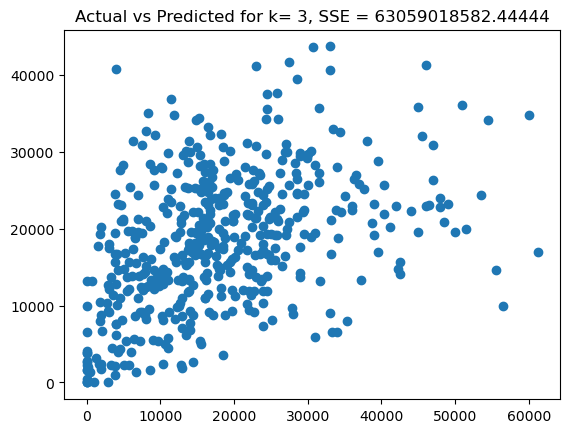

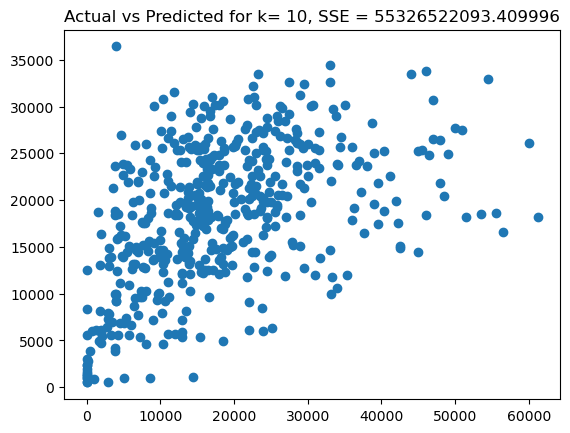

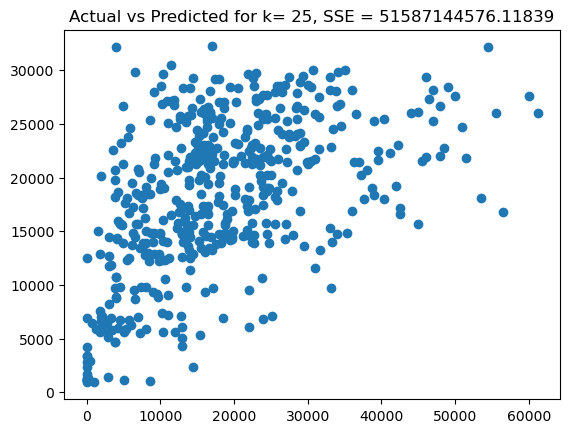

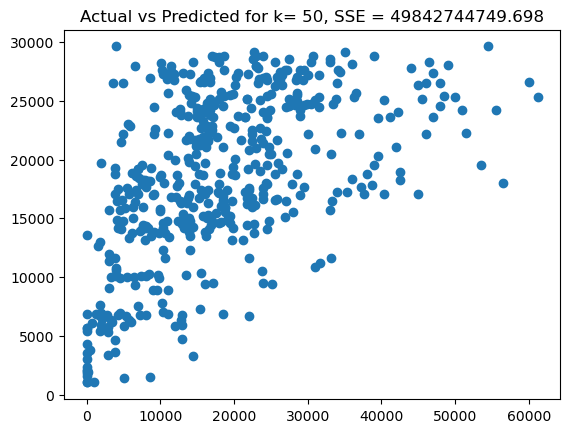

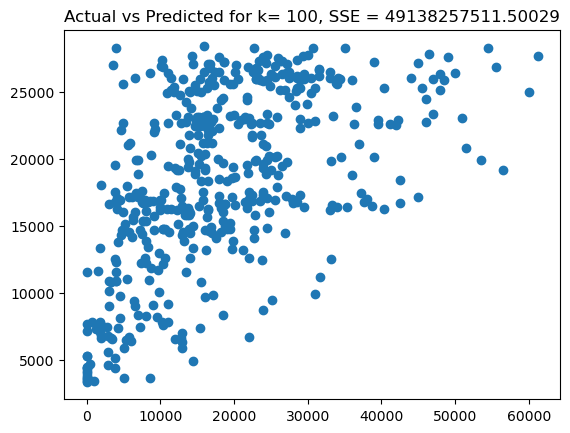

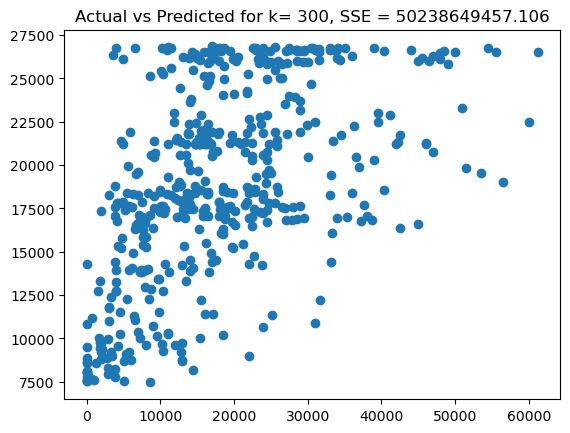

Text(0, 0.5, 'SSE')

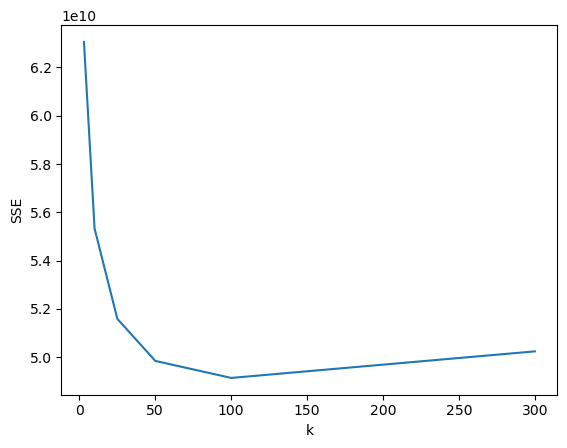

In [30]:
k_vals = [3, 10, 25, 50, 100, 300]    
sse_list = []
for k in k_vals:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    sse = np.sum((y_test-predictions)**2)
    sse_list.append(sse)

    plot, axes = plt.subplots()
    plt.scatter(y_test,predictions)
    plt.title('Actual vs Predicted for k= '+str(k)+', SSE = '+str(sse))
    plt.show()
    
plt.plot(k_vals, sse_list)
plt.xlabel('k')
plt.ylabel('SSE')

At first, as k increases there is a dramatic decrease in mean squared error. However, after around k=50, increasing k does not help the algorithm.

5. Determine the optimal $k$ for these data.


In [41]:
k_vals = []  
sse_list = []
for k in range (1, 300):
    k_vals.append(k)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    sse = np.sum((y_test-predictions)**2)
    sse_list.append(sse)

In [40]:
index_of_min_sse = sse_list.index(min(sse_list))
optimal_k = k_vals[index_of_min_sse]
print("Optimal k: ", optimal_k)

Optimal k:  77


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As k varied, the plots got more consistent and had a smaller range of y (SSE), until k surpassed 100. This makes sense with the optimal value of k being 77 because before 77, the model attempted to fit too precisely (overfitting) since there were too few training data points considered for each test point. The opposite happens for k values of 100+ which take into account too many data points, leading to a suboptimal model that underfits the data. To think of the extreme example, if k was equal to the number of data points, we would simply give each point the majority label, which would underfit. 

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.